In [1]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

from sklearn.decomposition import FastICA, PCA


Automatically created module for IPython interactive environment


In [2]:
# #############################################################################
# Generate sample data
np.random.seed(0)
n_samples = 2000
time = np.linspace(0, 8, n_samples)

s1 = np.sin(2 * time)  # Signal 1 : sinusoidal signal
s2 = np.sign(np.sin(3 * time))  # Signal 2 : square signal
s3 = signal.sawtooth(2 * np.pi * time)  # Signal 3: saw tooth signal

S = np.c_[s1, s2, s3]
S += 0.2 * np.random.normal(size=S.shape)  # Add noise

S /= S.std(axis=0)  # Standardize data

In [18]:
S[:,0]

array([ 0.495126  ,  0.64019598,  0.28913069, ..., -0.38561943,
       -0.50777458, -0.5550078 ])

In [19]:
s1

array([ 0.        ,  0.00800392,  0.01600732, ..., -0.27253687,
       -0.28022907, -0.28790332])

In [6]:
# Mix data
A = np.array([[1, 1, 1], [0.5, 2, 1.0], [1.5, 1.0, 2.0]])  # Mixing matrix
X = np.dot(S, A.T)  # Generate observations

In [7]:
# Compute ICA
ica = FastICA(n_components=3)
S_ = ica.fit_transform(X)  # Reconstruct signals
A_ = ica.mixing_  # Get estimated mixing matrix

In [14]:
S_

array([[ 2.87708979e-02,  8.79360931e-03,  6.72769974e-05],
       [ 4.13792541e-02,  1.09602569e-02,  2.81369526e-02],
       [ 3.55855216e-02,  3.31819018e-03,  1.95600983e-02],
       ...,
       [-2.86329778e-02, -1.28941811e-02, -1.61803583e-02],
       [-3.69211829e-02, -1.53470102e-02, -2.77023733e-02],
       [ 3.63842825e-02, -1.30408996e-02, -2.15447139e-02]])

In [8]:
# We can `prove` that the ICA model applies by reverting the unmixing.
assert np.allclose(X, np.dot(S_, A_.T) + ica.mean_)

# For comparison, compute PCA
pca = PCA(n_components=3)
H = pca.fit_transform(X)  # Reconstruct signals based on orthogonal components


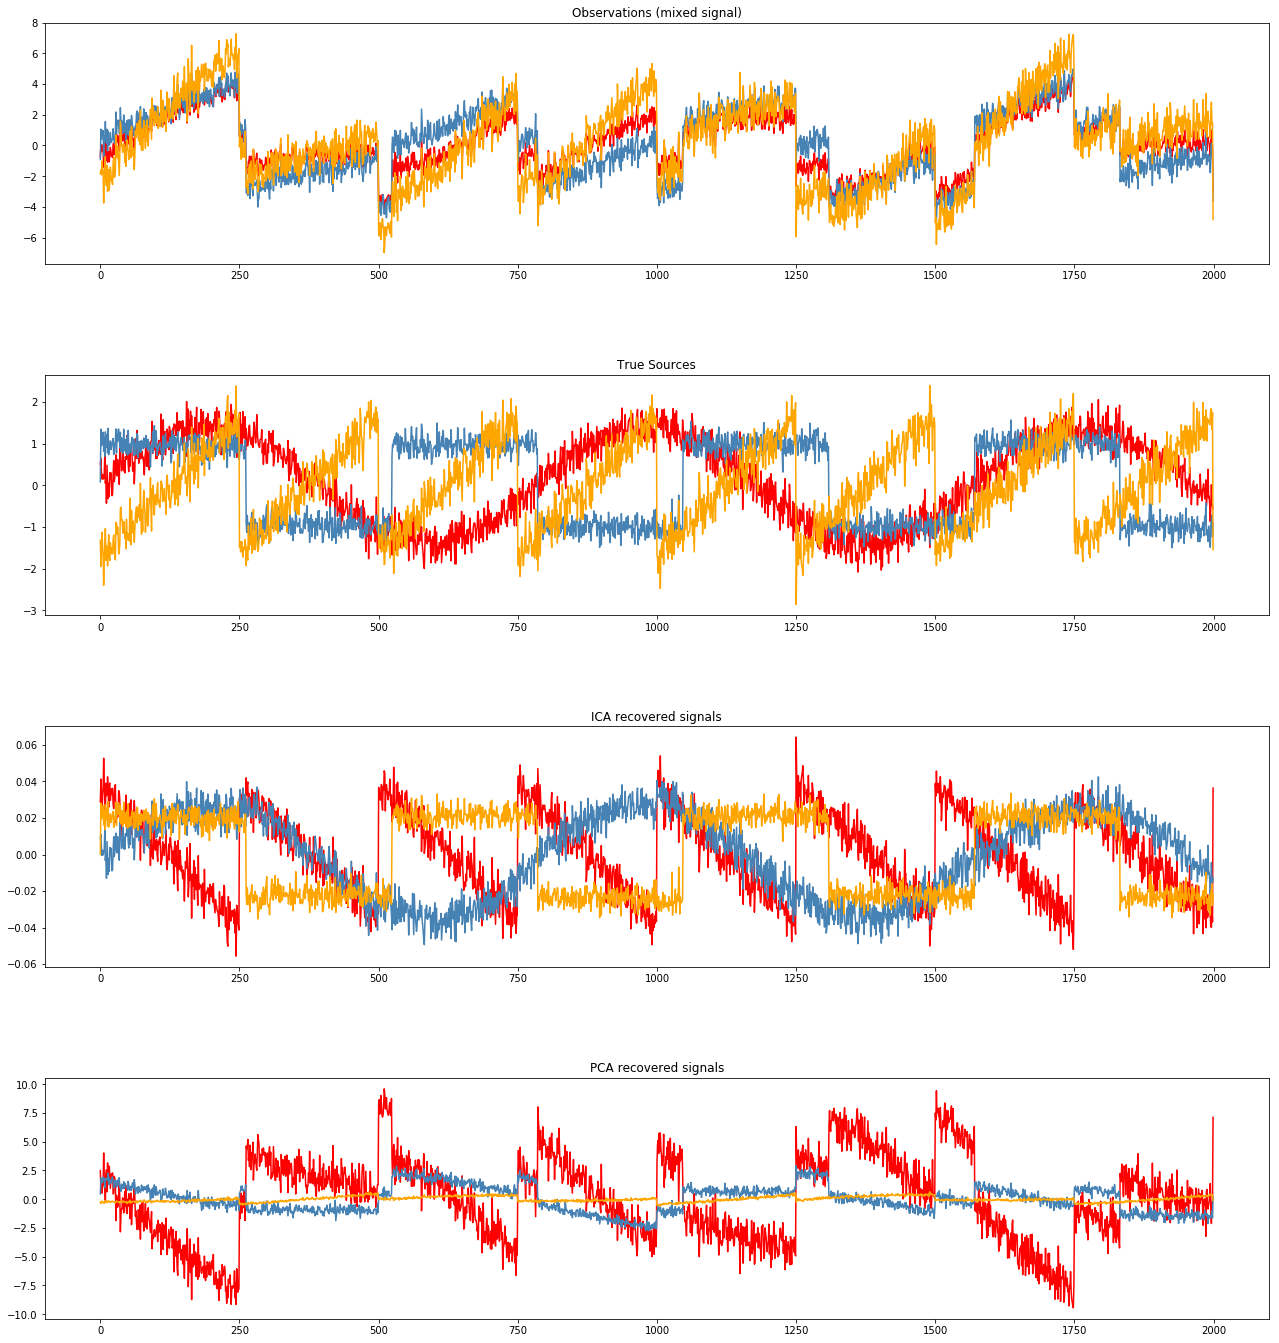

In [10]:
# #############################################################################
# Plot results

plt.figure(figsize=(20,20))

models = [X, S, S_, H]
names = ['Observations (mixed signal)',
         'True Sources',
         'ICA recovered signals',
         'PCA recovered signals']
colors = ['red', 'steelblue', 'orange']

for ii, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(4, 1, ii)
    plt.title(name)
    for sig, color in zip(model.T, colors):
        plt.plot(sig, color=color)

plt.subplots_adjust(0.09, 0.04, 0.94, 0.94, 0.26, 0.46)
plt.show()